# W2V

## 1. Read 50 pdf

In [1]:
import re
from pathlib import Path

pathlist = Path(r'C:\Users\ALMUG\Downloads\BondCovenant_Corpus\High Yield - Bond Documents\corpus\aaaaa').glob('**/*.txt')
full_data = ''
for file_path in pathlist:
#         path = r"C:\Users\ALMUG\Downloads\BondCovenant_Corpus\High Yield - Bond Documents\corpus\Aston Martin 2022 Prelim OM Mar 23 2017.txt"
    data = open(file_path, 'r', encoding="utf8")
    text = data.read()
    data.close()
    full_data = full_data + '\n' + text

### Total numb. of character in 50 pdf (Corpus)
### Totoal numb. of word (unclean ) in corpus

In [41]:
print(len(full_data))
print(len(full_data.split())) 


126400525
21944867


### Creating sentence splitter and stopwords

In [42]:
alphabets = "([A-Za-z0-9])"
special_char = "(,|\(|\)|;|\‘‘|£)"


In [43]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'but', 'if', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [44]:
import re
import string
def sentence_splitter(text):
    text = re.sub(alphabets + "\\n"+ alphabets ,"\\1<space>\\2",text)
    text = re.sub( alphabets + "\\n" + special_char ,"\\1<space>\\2",text)
    text = re.sub(special_char + "\\n" + alphabets,"\\1<space>\\2",text)
    text = re.sub("<space>"," ",text)
    text = re.sub("; and,",".\n",text)
    text = re.sub("; and",".\n",text)
    text = re.sub("; or",".\n",text)
    text = re.sub(", and",".\n",text)
    text = text.lower().strip()
    text = text.split('\n')
    sentences = []
    for i in text:
        i = re.sub("\(\w+\)","",i)
        i = re.sub("\d+", "", i)
        i = re.sub("(‘‘)|(’’)", "", i)
        table = str.maketrans({key: None for key in string.punctuation})
        i = i.translate(table)
        i = ' '.join(e for e in i.split() if e.lower() not in stopwords)
        sentences.append(i)
    return sentences

In [45]:
sentences = sentence_splitter(full_data)

### Starting 20 sentences (Unclean)

In [47]:
sentences[:20]

['important notice important must read following disclaimer continuing following disclaimer applies attached offering memorandum and therefore advised read disclaimer page carefully reading accessing or making use attached offering memorandum accessing attached offering memorandum agree bound following terms and conditions including modifications time time time receive information wind acquisition finance sa issuer defined or wind telecomunicazioni spa guarantor defined result access',
 'confirmation representation order eligible view offering memorandum or make investment decision respect securities must not us person within meaning regulation us securities act amended us securities act and outside united states',
 'qualified institutional buyer',
 'within meaning rule us securities act sent attached offering memorandum basis confirmed initial purchasers set forth attached offering memorandum collectively initial purchasers sender or senders attached either and customers represent not

### Observation from above sentences 
There are alot of sentences which have numb. of words <10

### Total numb. of sentences

In [48]:
len(sentences)

2708652

In [49]:
count = []
for sentence in sentences:
    length = len(sentence.split())
    count.append(length)

In [50]:
import pandas as pd
list_of_tuples = list(zip(sentences,count))
df = pd.DataFrame(list_of_tuples, columns = ['sentences', 'count'])

### Below df contains sentences and word count in a sentence

In [51]:
df.head(20)

,sentences,count
0,important notice important must read following...,60
1,confirmation representation order eligible vie...,31
2,qualified institutional buyer,3
3,within meaning rule us securities act sent att...,33
4,electronic mail or email address delivered not...,36
5,and customers represent qualified institutiona...,13
6,offering memorandum sent electronic form remin...,65
7,reminded attached offering memorandum delivere...,49
8,restrictions nothing electronic transmission c...,68
9,communication directed solely persons outside ...,70


In [52]:
df['sentences'][5]

'and customers represent qualified institutional buyers and either case consent delivery electronic transmission'

In [53]:
df['sentences'][84]

'determined offering memorandum truthful or complete representation contrary criminal offense'

### Max. word in a sentences is 527

In [54]:
df['count'].max()

527

### Plot of total number of words in each sentences

No handles with labels found to put in legend.


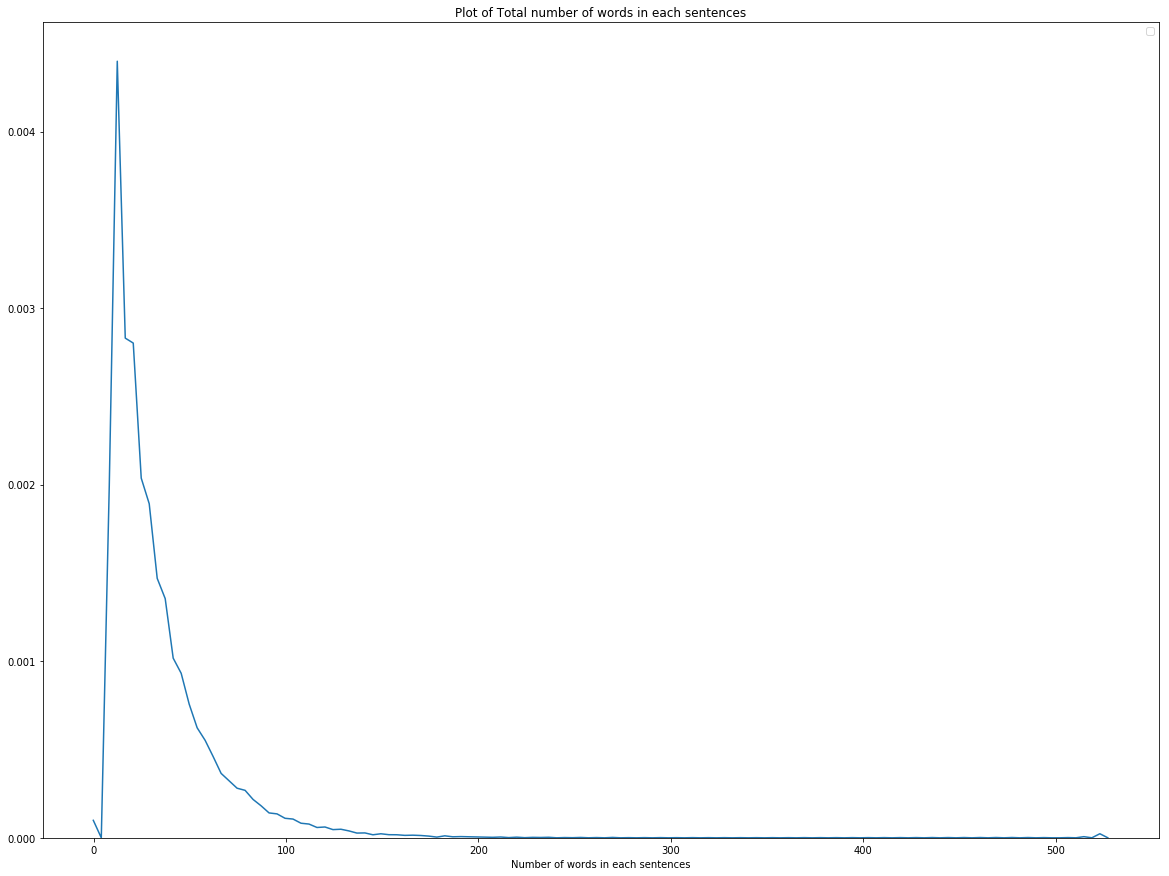

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.distplot(df['count'], hist=False)
plt.title('Plot of Total number of words in each sentences')
plt.xlabel('Number of words in each sentences')
plt.legend()
plt.show()

### Important in below cell number of row which is 2.7 million sentences

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708652 entries, 0 to 2708651
Data columns (total 2 columns):
sentences    object
count        int64
dtypes: int64(1), object(1)
memory usage: 41.3+ MB


In [57]:
df1 = df[df['count'] > 10]

### Now the number of sentences come down to 2 lakhs (10% only)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262326 entries, 0 to 2708637
Data columns (total 2 columns):
sentences    262326 non-null object
count        262326 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.0+ MB


### Cleaned sentences

In [59]:
df1.head(20)

,sentences,count
0,important notice important must read following...,60
1,confirmation representation order eligible vie...,31
3,within meaning rule us securities act sent att...,33
4,electronic mail or email address delivered not...,36
5,and customers represent qualified institutiona...,13
6,offering memorandum sent electronic form remin...,65
7,reminded attached offering memorandum delivere...,49
8,restrictions nothing electronic transmission c...,68
9,communication directed solely persons outside ...,70
11,information offering memorandum not complete a...,26


In [60]:
sentences = list(df1['sentences'])

In [61]:
type(sentences)

list

### cleaned sentences

In [62]:
sentences[:10]

['important notice important must read following disclaimer continuing following disclaimer applies attached offering memorandum and therefore advised read disclaimer page carefully reading accessing or making use attached offering memorandum accessing attached offering memorandum agree bound following terms and conditions including modifications time time time receive information wind acquisition finance sa issuer defined or wind telecomunicazioni spa guarantor defined result access',
 'confirmation representation order eligible view offering memorandum or make investment decision respect securities must not us person within meaning regulation us securities act amended us securities act and outside united states',
 'within meaning rule us securities act sent attached offering memorandum basis confirmed initial purchasers set forth attached offering memorandum collectively initial purchasers sender or senders attached either and customers represent not us persons',
 'electronic mail or

# Part2

### Below code is to copy all text to 1 text file

In [289]:
from tqdm import tqdm
for sentence in tqdm(sentences):
    with open( "full_corpus" + '.txt', 'a', encoding="utf-8") as out_file:
        out_file.write(sentence + '\n')
out_file.close()        




  0%|                                                                                       | 0/262326 [00:00<?, ?it/s]


  0%|                                                                             | 19/262326 [00:00<23:08, 188.85it/s]


  0%|                                                                             | 49/262326 [00:00<20:36, 212.14it/s]


  0%|                                                                             | 69/262326 [00:00<21:23, 204.40it/s]


  0%|                                                                             | 98/262326 [00:00<19:36, 222.85it/s]


  0%|                                                                            | 126/262326 [00:00<18:26, 236.95it/s]


  0%|                                                                            | 151/262326 [00:00<18:14, 239.48it/s]


  0%|                                                                            | 179/262326 [00:00<17:29, 249.85it/s]


  0%|                

  2%|█▏                                                                         | 3973/262326 [00:14<14:20, 300.26it/s]


  2%|█▏                                                                         | 4004/262326 [00:14<14:48, 290.60it/s]


  2%|█▏                                                                         | 4034/262326 [00:14<15:00, 286.86it/s]


  2%|█▏                                                                         | 4066/262326 [00:14<14:36, 294.64it/s]


  2%|█▏                                                                         | 4096/262326 [00:14<14:43, 292.15it/s]


  2%|█▏                                                                         | 4129/262326 [00:14<14:19, 300.31it/s]


  2%|█▏                                                                         | 4161/262326 [00:14<14:05, 305.32it/s]


  2%|█▏                                                                         | 4193/262326 [00:14<13:58, 308.03it/s]


  2%|█▏                 

  3%|██▎                                                                        | 8147/262326 [00:28<14:08, 299.71it/s]


  3%|██▎                                                                        | 8178/262326 [00:28<14:28, 292.69it/s]


  3%|██▎                                                                        | 8210/262326 [00:28<14:12, 298.09it/s]


  3%|██▎                                                                        | 8242/262326 [00:28<13:58, 303.17it/s]


  3%|██▎                                                                        | 8273/262326 [00:28<14:33, 290.86it/s]


  3%|██▎                                                                        | 8305/262326 [00:29<14:13, 297.60it/s]


  3%|██▍                                                                        | 8337/262326 [00:29<13:57, 303.32it/s]


  3%|██▍                                                                        | 8368/262326 [00:29<14:13, 297.65it/s]


  3%|██▍                

  5%|███▍                                                                      | 12236/262326 [00:42<13:41, 304.28it/s]


  5%|███▍                                                                      | 12268/262326 [00:43<13:33, 307.33it/s]


  5%|███▍                                                                      | 12299/262326 [00:43<13:45, 302.94it/s]


  5%|███▍                                                                      | 12330/262326 [00:43<13:42, 304.01it/s]


  5%|███▍                                                                      | 12361/262326 [00:43<14:08, 294.71it/s]


  5%|███▍                                                                      | 12392/262326 [00:43<13:57, 298.50it/s]


  5%|███▌                                                                      | 12423/262326 [00:43<13:54, 299.48it/s]


  5%|███▌                                                                      | 12454/262326 [00:43<14:37, 284.81it/s]


  5%|███▌               

  6%|████▋                                                                     | 16454/262326 [00:57<13:12, 310.23it/s]


  6%|████▋                                                                     | 16486/262326 [00:57<13:41, 299.34it/s]


  6%|████▋                                                                     | 16517/262326 [00:57<13:43, 298.32it/s]


  6%|████▋                                                                     | 16548/262326 [00:57<13:36, 301.08it/s]


  6%|████▋                                                                     | 16581/262326 [00:57<13:20, 306.86it/s]


  6%|████▋                                                                     | 16612/262326 [00:57<13:46, 297.43it/s]


  6%|████▋                                                                     | 16642/262326 [00:57<14:22, 284.89it/s]


  6%|████▋                                                                     | 16672/262326 [00:57<14:09, 289.25it/s]


  6%|████▋              

  8%|█████▊                                                                    | 20558/262326 [01:14<12:58, 310.36it/s]


  8%|█████▊                                                                    | 20591/262326 [01:14<12:48, 314.44it/s]


  8%|█████▊                                                                    | 20623/262326 [01:15<12:55, 311.65it/s]


  8%|█████▊                                                                    | 20655/262326 [01:15<12:57, 310.99it/s]


  8%|█████▊                                                                    | 20687/262326 [01:15<12:52, 312.97it/s]


  8%|█████▊                                                                    | 20719/262326 [01:15<13:01, 309.04it/s]


  8%|█████▊                                                                    | 20752/262326 [01:15<12:52, 312.58it/s]


  8%|█████▊                                                                    | 20785/262326 [01:15<12:46, 315.26it/s]


  8%|█████▊             

  9%|██████▉                                                                   | 24658/262326 [01:29<14:30, 272.96it/s]


  9%|██████▉                                                                   | 24686/262326 [01:29<14:33, 272.05it/s]


  9%|██████▉                                                                   | 24717/262326 [01:29<14:05, 281.10it/s]


  9%|██████▉                                                                   | 24746/262326 [01:29<13:59, 283.10it/s]


  9%|██████▉                                                                   | 24778/262326 [01:29<13:33, 291.86it/s]


  9%|██████▉                                                                   | 24808/262326 [01:30<14:01, 282.35it/s]


  9%|███████                                                                   | 24837/262326 [01:30<14:08, 279.87it/s]


  9%|███████                                                                   | 24866/262326 [01:30<14:39, 270.00it/s]


  9%|███████            

 11%|████████                                                                  | 28779/262326 [01:43<13:11, 295.02it/s]


 11%|████████▏                                                                 | 28809/262326 [01:44<13:23, 290.70it/s]


 11%|████████▏                                                                 | 28842/262326 [01:44<12:58, 300.05it/s]


 11%|████████▏                                                                 | 28873/262326 [01:44<12:58, 299.70it/s]


 11%|████████▏                                                                 | 28904/262326 [01:44<13:21, 291.06it/s]


 11%|████████▏                                                                 | 28937/262326 [01:44<12:55, 301.12it/s]


 11%|████████▏                                                                 | 28969/262326 [01:44<12:47, 304.16it/s]


 11%|████████▏                                                                 | 29000/262326 [01:44<12:44, 305.23it/s]


 11%|████████▏          

 13%|█████████▎                                                                | 32843/262326 [01:58<13:35, 281.34it/s]


 13%|█████████▎                                                                | 32873/262326 [01:58<13:24, 285.28it/s]


 13%|█████████▎                                                                | 32903/262326 [01:58<13:12, 289.39it/s]


 13%|█████████▎                                                                | 32936/262326 [01:59<12:56, 295.27it/s]


 13%|█████████▎                                                                | 32971/262326 [01:59<12:36, 303.27it/s]


 13%|█████████▎                                                                | 33003/262326 [01:59<12:57, 294.94it/s]


 13%|█████████▎                                                                | 33033/262326 [01:59<12:56, 295.21it/s]


 13%|█████████▎                                                                | 33063/262326 [01:59<14:45, 258.86it/s]


 13%|█████████▎         

 14%|██████████▍                                                               | 37144/262326 [02:13<12:39, 296.56it/s]


 14%|██████████▍                                                               | 37176/262326 [02:13<12:27, 301.05it/s]


 14%|██████████▍                                                               | 37207/262326 [02:13<12:21, 303.52it/s]


 14%|██████████▌                                                               | 37242/262326 [02:13<12:19, 304.57it/s]


 14%|██████████▌                                                               | 37274/262326 [02:13<12:11, 307.77it/s]


 14%|██████████▌                                                               | 37305/262326 [02:13<12:10, 308.21it/s]


 14%|██████████▌                                                               | 37336/262326 [02:14<12:11, 307.52it/s]


 14%|██████████▌                                                               | 37367/262326 [02:14<12:11, 307.68it/s]


 14%|██████████▌        

 16%|███████████▋                                                              | 41447/262326 [02:28<15:13, 241.82it/s]


 16%|███████████▋                                                              | 41472/262326 [02:28<15:16, 241.08it/s]


 16%|███████████▋                                                              | 41497/262326 [02:28<15:17, 240.57it/s]


 16%|███████████▋                                                              | 41522/262326 [02:28<16:44, 219.81it/s]


 16%|███████████▋                                                              | 41550/262326 [02:28<15:45, 233.47it/s]


 16%|███████████▋                                                              | 41574/262326 [02:28<17:20, 212.09it/s]


 16%|███████████▋                                                              | 41597/262326 [02:28<17:50, 206.11it/s]


 16%|███████████▋                                                              | 41619/262326 [02:28<18:20, 200.49it/s]


 16%|███████████▋       

 17%|████████████▊                                                             | 45509/262326 [02:42<14:25, 250.62it/s]


 17%|████████████▊                                                             | 45544/262326 [02:43<13:40, 264.36it/s]


 17%|████████████▊                                                             | 45576/262326 [02:43<12:57, 278.70it/s]


 17%|████████████▊                                                             | 45605/262326 [02:43<13:23, 269.75it/s]


 17%|████████████▊                                                             | 45633/262326 [02:43<14:21, 251.67it/s]


 17%|████████████▉                                                             | 45661/262326 [02:43<14:08, 255.31it/s]


 17%|████████████▉                                                             | 45693/262326 [02:43<13:19, 271.00it/s]


 17%|████████████▉                                                             | 45721/262326 [02:43<14:01, 257.31it/s]


 17%|████████████▉      

 19%|██████████████                                                            | 49724/262326 [02:57<11:53, 298.12it/s]


 19%|██████████████                                                            | 49760/262326 [02:57<11:41, 303.12it/s]


 19%|██████████████                                                            | 49791/262326 [02:57<11:38, 304.25it/s]


 19%|██████████████                                                            | 49827/262326 [02:57<11:32, 306.99it/s]


 19%|██████████████                                                            | 49858/262326 [02:57<11:31, 307.31it/s]


 19%|██████████████                                                            | 49890/262326 [02:58<11:24, 310.23it/s]


 19%|██████████████                                                            | 49922/262326 [02:58<11:20, 312.06it/s]


 19%|██████████████                                                            | 49954/262326 [02:58<11:53, 297.64it/s]


 19%|██████████████     

 21%|███████████████▏                                                          | 54057/262326 [03:12<11:23, 304.54it/s]


 21%|███████████████▎                                                          | 54088/262326 [03:12<11:29, 302.11it/s]


 21%|███████████████▎                                                          | 54120/262326 [03:12<11:18, 306.73it/s]


 21%|███████████████▎                                                          | 54157/262326 [03:12<11:09, 310.89it/s]


 21%|███████████████▎                                                          | 54189/262326 [03:12<11:03, 313.51it/s]


 21%|███████████████▎                                                          | 54221/262326 [03:12<11:31, 300.88it/s]


 21%|███████████████▎                                                          | 54252/262326 [03:12<11:26, 302.96it/s]


 21%|███████████████▎                                                          | 54283/262326 [03:13<11:55, 290.66it/s]


 21%|███████████████▎   

 22%|████████████████▍                                                         | 58354/262326 [03:26<11:07, 305.74it/s]


 22%|████████████████▍                                                         | 58386/262326 [03:26<11:02, 308.01it/s]


 22%|████████████████▍                                                         | 58418/262326 [03:27<11:23, 298.21it/s]


 22%|████████████████▍                                                         | 58449/262326 [03:27<11:22, 298.66it/s]


 22%|████████████████▍                                                         | 58479/262326 [03:27<11:35, 293.22it/s]


 22%|████████████████▌                                                         | 58509/262326 [03:27<11:46, 288.43it/s]


 22%|████████████████▌                                                         | 58544/262326 [03:27<11:35, 292.97it/s]


 22%|████████████████▌                                                         | 58574/262326 [03:27<11:32, 294.07it/s]


 22%|████████████████▌  

 24%|█████████████████▋                                                        | 62576/262326 [03:41<10:56, 304.24it/s]


 24%|█████████████████▋                                                        | 62607/262326 [03:41<10:58, 303.08it/s]


 24%|█████████████████▋                                                        | 62638/262326 [03:41<11:44, 283.63it/s]


 24%|█████████████████▋                                                        | 62667/262326 [03:41<11:44, 283.23it/s]


 24%|█████████████████▋                                                        | 62696/262326 [03:41<12:01, 276.52it/s]


 24%|█████████████████▋                                                        | 62724/262326 [03:41<12:26, 267.45it/s]


 24%|█████████████████▋                                                        | 62753/262326 [03:42<12:12, 272.49it/s]


 24%|█████████████████▋                                                        | 62783/262326 [03:42<11:55, 278.84it/s]


 24%|█████████████████▋ 

 25%|██████████████████▊                                                       | 66520/262326 [03:56<11:55, 273.53it/s]


 25%|██████████████████▊                                                       | 66548/262326 [03:56<12:41, 257.22it/s]


 25%|██████████████████▊                                                       | 66578/262326 [03:56<12:22, 263.68it/s]


 25%|██████████████████▊                                                       | 66608/262326 [03:56<11:55, 273.39it/s]


 25%|██████████████████▊                                                       | 66637/262326 [03:56<11:48, 276.06it/s]


 25%|██████████████████▊                                                       | 66670/262326 [03:56<11:37, 280.69it/s]


 25%|██████████████████▊                                                       | 66699/262326 [03:56<11:36, 280.69it/s]


 25%|██████████████████▊                                                       | 66733/262326 [03:56<11:23, 286.10it/s]


 25%|██████████████████▊

 27%|███████████████████▉                                                      | 70572/262326 [04:10<11:33, 276.34it/s]


 27%|███████████████████▉                                                      | 70601/262326 [04:10<11:28, 278.48it/s]


 27%|███████████████████▉                                                      | 70638/262326 [04:10<11:00, 290.29it/s]


 27%|███████████████████▉                                                      | 70668/262326 [04:10<10:54, 292.79it/s]


 27%|███████████████████▉                                                      | 70698/262326 [04:10<10:50, 294.42it/s]


 27%|███████████████████▉                                                      | 70735/262326 [04:11<10:33, 302.26it/s]


 27%|███████████████████▉                                                      | 70766/262326 [04:11<10:33, 302.25it/s]


 27%|███████████████████▉                                                      | 70797/262326 [04:11<10:36, 300.69it/s]


 27%|███████████████████

 29%|█████████████████████                                                     | 74785/262326 [04:24<10:45, 290.65it/s]


 29%|█████████████████████                                                     | 74815/262326 [04:25<10:39, 293.03it/s]


 29%|█████████████████████                                                     | 74849/262326 [04:25<10:38, 293.73it/s]


 29%|█████████████████████                                                     | 74881/262326 [04:25<10:29, 297.80it/s]


 29%|█████████████████████▏                                                    | 74911/262326 [04:25<10:36, 294.54it/s]


 29%|█████████████████████▏                                                    | 74945/262326 [04:25<10:23, 300.46it/s]


 29%|█████████████████████▏                                                    | 74977/262326 [04:25<10:19, 302.52it/s]


 29%|█████████████████████▏                                                    | 75013/262326 [04:25<10:11, 306.49it/s]


 29%|███████████████████

 30%|██████████████████████▏                                                   | 78856/262326 [04:39<10:33, 289.63it/s]


 30%|██████████████████████▎                                                   | 78886/262326 [04:39<10:54, 280.42it/s]


 30%|██████████████████████▎                                                   | 78916/262326 [04:39<10:42, 285.51it/s]


 30%|██████████████████████▎                                                   | 78946/262326 [04:39<10:37, 287.62it/s]


 30%|██████████████████████▎                                                   | 78977/262326 [04:39<10:25, 293.35it/s]


 30%|██████████████████████▎                                                   | 79012/262326 [04:39<10:12, 299.20it/s]


 30%|██████████████████████▎                                                   | 79043/262326 [04:39<10:07, 301.54it/s]


 30%|██████████████████████▎                                                   | 79080/262326 [04:40<09:55, 307.47it/s]


 30%|███████████████████

 32%|███████████████████████▍                                                  | 83071/262326 [04:53<10:07, 294.87it/s]


 32%|███████████████████████▍                                                  | 83104/262326 [04:53<10:39, 280.35it/s]


 32%|███████████████████████▍                                                  | 83135/262326 [04:54<10:25, 286.58it/s]


 32%|███████████████████████▍                                                  | 83171/262326 [04:54<10:10, 293.27it/s]


 32%|███████████████████████▍                                                  | 83202/262326 [04:54<10:05, 295.94it/s]


 32%|███████████████████████▍                                                  | 83236/262326 [04:54<10:04, 296.49it/s]


 32%|███████████████████████▍                                                  | 83267/262326 [04:54<09:56, 300.35it/s]


 32%|███████████████████████▍                                                  | 83298/262326 [04:54<10:17, 289.97it/s]


 32%|███████████████████

 33%|████████████████████████▋                                                 | 87304/262326 [05:08<10:16, 283.72it/s]


 33%|████████████████████████▋                                                 | 87336/262326 [05:08<09:57, 292.84it/s]


 33%|████████████████████████▋                                                 | 87366/262326 [05:08<12:09, 239.98it/s]


 33%|████████████████████████▋                                                 | 87399/262326 [05:08<11:16, 258.48it/s]


 33%|████████████████████████▋                                                 | 87435/262326 [05:08<10:42, 272.41it/s]


 33%|████████████████████████▋                                                 | 87468/262326 [05:09<10:11, 286.03it/s]


 33%|████████████████████████▋                                                 | 87504/262326 [05:09<09:55, 293.54it/s]


 33%|████████████████████████▋                                                 | 87535/262326 [05:09<09:59, 291.42it/s]


 33%|███████████████████

 35%|█████████████████████████▋                                                | 91262/262326 [05:23<10:41, 266.81it/s]


 35%|█████████████████████████▊                                                | 91295/262326 [05:23<10:22, 274.66it/s]


 35%|█████████████████████████▊                                                | 91331/262326 [05:23<10:00, 284.82it/s]


 35%|█████████████████████████▊                                                | 91360/262326 [05:23<10:29, 271.66it/s]


 35%|█████████████████████████▊                                                | 91388/262326 [05:23<10:30, 270.93it/s]


 35%|█████████████████████████▊                                                | 91416/262326 [05:23<10:50, 262.67it/s]


 35%|█████████████████████████▊                                                | 91443/262326 [05:24<11:37, 244.88it/s]


 35%|█████████████████████████▊                                                | 91470/262326 [05:24<11:22, 250.37it/s]


 35%|███████████████████

 36%|██████████████████████████▊                                               | 95212/262326 [05:38<09:26, 294.80it/s]


 36%|██████████████████████████▊                                               | 95242/262326 [05:38<09:28, 294.16it/s]


 36%|██████████████████████████▉                                               | 95272/262326 [05:38<10:02, 277.13it/s]


 36%|██████████████████████████▉                                               | 95302/262326 [05:38<09:51, 282.58it/s]


 36%|██████████████████████████▉                                               | 95331/262326 [05:38<09:49, 283.32it/s]


 36%|██████████████████████████▉                                               | 95360/262326 [05:38<10:05, 275.77it/s]


 36%|██████████████████████████▉                                               | 95389/262326 [05:38<09:59, 278.62it/s]


 36%|██████████████████████████▉                                               | 95420/262326 [05:38<09:44, 285.74it/s]


 36%|███████████████████

 38%|████████████████████████████                                              | 99359/262326 [05:52<09:06, 298.47it/s]


 38%|████████████████████████████                                              | 99390/262326 [05:52<09:01, 300.92it/s]


 38%|████████████████████████████                                              | 99426/262326 [05:52<08:54, 304.68it/s]


 38%|████████████████████████████                                              | 99457/262326 [05:52<08:54, 304.67it/s]


 38%|████████████████████████████                                              | 99488/262326 [05:53<09:47, 277.38it/s]


 38%|████████████████████████████                                              | 99521/262326 [05:53<09:40, 280.55it/s]


 38%|████████████████████████████                                              | 99551/262326 [05:53<09:32, 284.48it/s]


 38%|████████████████████████████                                              | 99584/262326 [05:53<09:28, 286.11it/s]


 38%|███████████████████

 39%|████████████████████████████▊                                            | 103366/262326 [06:07<09:15, 286.29it/s]


 39%|████████████████████████████▊                                            | 103397/262326 [06:07<09:03, 292.41it/s]


 39%|████████████████████████████▊                                            | 103427/262326 [06:07<09:05, 291.54it/s]


 39%|████████████████████████████▊                                            | 103461/262326 [06:07<09:17, 285.08it/s]


 39%|████████████████████████████▊                                            | 103490/262326 [06:07<09:22, 282.62it/s]


 39%|████████████████████████████▊                                            | 103523/262326 [06:08<09:20, 283.56it/s]


 39%|████████████████████████████▊                                            | 103557/262326 [06:08<09:12, 287.33it/s]


 39%|████████████████████████████▊                                            | 103587/262326 [06:08<09:09, 288.62it/s]


 39%|███████████████████

 41%|█████████████████████████████▉                                           | 107535/262326 [06:22<09:02, 285.54it/s]


 41%|█████████████████████████████▉                                           | 107564/262326 [06:22<09:06, 283.15it/s]


 41%|█████████████████████████████▉                                           | 107597/262326 [06:22<08:56, 288.65it/s]


 41%|█████████████████████████████▉                                           | 107629/262326 [06:22<08:40, 297.25it/s]


 41%|█████████████████████████████▉                                           | 107659/262326 [06:22<08:55, 288.93it/s]


 41%|█████████████████████████████▉                                           | 107692/262326 [06:22<08:43, 295.49it/s]


 41%|█████████████████████████████▉                                           | 107722/262326 [06:22<08:43, 295.28it/s]


 41%|█████████████████████████████▉                                           | 107759/262326 [06:22<08:29, 303.32it/s]


 41%|███████████████████

 42%|██████████████████████████████▉                                          | 111312/262326 [06:37<09:35, 262.31it/s]


 42%|██████████████████████████████▉                                          | 111339/262326 [06:37<09:33, 263.23it/s]


 42%|██████████████████████████████▉                                          | 111366/262326 [06:37<09:33, 263.13it/s]


 42%|██████████████████████████████▉                                          | 111393/262326 [06:37<11:42, 214.72it/s]


 42%|███████████████████████████████                                          | 111422/262326 [06:37<10:55, 230.33it/s]


 42%|███████████████████████████████                                          | 111449/262326 [06:37<10:29, 239.80it/s]


 42%|███████████████████████████████                                          | 111478/262326 [06:37<10:07, 248.50it/s]


 43%|███████████████████████████████                                          | 111504/262326 [06:37<10:03, 250.07it/s]


 43%|███████████████████

 44%|████████████████████████████████                                         | 115235/262326 [06:51<08:54, 274.97it/s]


 44%|████████████████████████████████                                         | 115263/262326 [06:51<08:55, 274.78it/s]


 44%|████████████████████████████████                                         | 115293/262326 [06:51<08:50, 277.00it/s]


 44%|████████████████████████████████                                         | 115323/262326 [06:51<08:42, 281.35it/s]


 44%|████████████████████████████████                                         | 115352/262326 [06:52<08:48, 278.10it/s]


 44%|████████████████████████████████                                         | 115387/262326 [06:52<08:31, 287.04it/s]


 44%|████████████████████████████████                                         | 115418/262326 [06:52<08:23, 291.50it/s]


 44%|████████████████████████████████▏                                        | 115448/262326 [06:52<09:12, 265.81it/s]


 44%|███████████████████

 45%|█████████████████████████████████▏                                       | 119280/262326 [07:06<08:16, 288.33it/s]


 45%|█████████████████████████████████▏                                       | 119311/262326 [07:06<08:09, 292.38it/s]


 45%|█████████████████████████████████▏                                       | 119343/262326 [07:06<08:05, 294.26it/s]


 46%|█████████████████████████████████▏                                       | 119378/262326 [07:07<08:01, 297.18it/s]


 46%|█████████████████████████████████▏                                       | 119408/262326 [07:07<08:03, 295.76it/s]


 46%|█████████████████████████████████▏                                       | 119438/262326 [07:07<08:13, 289.51it/s]


 46%|█████████████████████████████████▏                                       | 119469/262326 [07:07<08:11, 290.92it/s]


 46%|█████████████████████████████████▎                                       | 119499/262326 [07:07<08:27, 281.36it/s]


 46%|███████████████████

 47%|██████████████████████████████████▎                                      | 123414/262326 [07:21<08:47, 263.33it/s]


 47%|██████████████████████████████████▎                                      | 123443/262326 [07:21<08:36, 268.83it/s]


 47%|██████████████████████████████████▎                                      | 123472/262326 [07:21<08:30, 272.16it/s]


 47%|██████████████████████████████████▎                                      | 123507/262326 [07:21<08:27, 273.63it/s]


 47%|██████████████████████████████████▍                                      | 123535/262326 [07:21<08:26, 274.12it/s]


 47%|██████████████████████████████████▍                                      | 123567/262326 [07:21<08:27, 273.37it/s]


 47%|██████████████████████████████████▍                                      | 123602/262326 [07:22<08:12, 281.69it/s]


 47%|██████████████████████████████████▍                                      | 123634/262326 [07:22<07:57, 290.47it/s]


 47%|███████████████████

 49%|███████████████████████████████████▍                                     | 127455/262326 [07:36<07:41, 292.07it/s]


 49%|███████████████████████████████████▍                                     | 127489/262326 [07:36<07:41, 292.48it/s]


 49%|███████████████████████████████████▍                                     | 127519/262326 [07:36<07:48, 287.77it/s]


 49%|███████████████████████████████████▍                                     | 127549/262326 [07:36<07:52, 285.11it/s]


 49%|███████████████████████████████████▌                                     | 127581/262326 [07:36<07:38, 293.62it/s]


 49%|███████████████████████████████████▌                                     | 127613/262326 [07:36<07:47, 288.39it/s]


 49%|███████████████████████████████████▌                                     | 127642/262326 [07:36<07:53, 284.41it/s]


 49%|███████████████████████████████████▌                                     | 127677/262326 [07:36<07:40, 292.45it/s]


 49%|███████████████████

 50%|████████████████████████████████████▌                                    | 131455/262326 [07:50<09:36, 226.95it/s]


 50%|████████████████████████████████████▌                                    | 131485/262326 [07:50<08:56, 243.80it/s]


 50%|████████████████████████████████████▌                                    | 131513/262326 [07:51<08:40, 251.11it/s]


 50%|████████████████████████████████████▌                                    | 131539/262326 [07:51<09:17, 234.71it/s]


 50%|████████████████████████████████████▌                                    | 131564/262326 [07:51<09:31, 228.73it/s]


 50%|████████████████████████████████████▌                                    | 131589/262326 [07:51<09:19, 233.87it/s]


 50%|████████████████████████████████████▋                                    | 131617/262326 [07:51<08:52, 245.56it/s]


 50%|████████████████████████████████████▋                                    | 131646/262326 [07:51<08:34, 254.20it/s]


 50%|███████████████████

 52%|█████████████████████████████████████▋                                   | 135488/262326 [08:05<07:21, 287.34it/s]


 52%|█████████████████████████████████████▋                                   | 135523/262326 [08:05<07:14, 291.95it/s]


 52%|█████████████████████████████████████▋                                   | 135553/262326 [08:05<07:12, 292.84it/s]


 52%|█████████████████████████████████████▋                                   | 135585/262326 [08:05<07:19, 288.12it/s]


 52%|█████████████████████████████████████▋                                   | 135614/262326 [08:05<07:18, 288.66it/s]


 52%|█████████████████████████████████████▋                                   | 135643/262326 [08:06<07:39, 275.89it/s]


 52%|█████████████████████████████████████▊                                   | 135675/262326 [08:06<07:22, 286.51it/s]


 52%|█████████████████████████████████████▊                                   | 135705/262326 [08:06<07:16, 290.15it/s]


 52%|███████████████████

 53%|██████████████████████████████████████▊                                  | 139588/262326 [08:20<07:29, 273.13it/s]


 53%|██████████████████████████████████████▊                                  | 139616/262326 [08:20<07:52, 259.50it/s]


 53%|██████████████████████████████████████▊                                  | 139646/262326 [08:20<07:35, 269.20it/s]


 53%|██████████████████████████████████████▊                                  | 139674/262326 [08:20<07:48, 261.64it/s]


 53%|██████████████████████████████████████▉                                  | 139701/262326 [08:20<08:18, 246.13it/s]


 53%|██████████████████████████████████████▉                                  | 139731/262326 [08:20<07:59, 255.72it/s]


 53%|██████████████████████████████████████▉                                  | 139766/262326 [08:20<07:36, 268.70it/s]


 53%|██████████████████████████████████████▉                                  | 139798/262326 [08:20<07:16, 280.92it/s]


 53%|███████████████████

 55%|███████████████████████████████████████▉                                 | 143676/262326 [08:34<07:45, 255.12it/s]


 55%|███████████████████████████████████████▉                                 | 143707/262326 [08:35<07:21, 268.64it/s]


 55%|███████████████████████████████████████▉                                 | 143739/262326 [08:35<07:15, 272.05it/s]


 55%|████████████████████████████████████████                                 | 143767/262326 [08:35<07:13, 273.38it/s]


 55%|████████████████████████████████████████                                 | 143795/262326 [08:35<07:11, 274.80it/s]


 55%|████████████████████████████████████████                                 | 143826/262326 [08:35<07:14, 272.77it/s]


 55%|████████████████████████████████████████                                 | 143856/262326 [08:35<07:24, 266.77it/s]


 55%|████████████████████████████████████████                                 | 143887/262326 [08:35<07:05, 278.19it/s]


 55%|███████████████████

 56%|█████████████████████████████████████████▏                               | 147800/262326 [08:49<06:51, 278.51it/s]


 56%|█████████████████████████████████████████▏                               | 147829/262326 [08:49<07:02, 270.73it/s]


 56%|█████████████████████████████████████████▏                               | 147860/262326 [08:49<06:49, 279.39it/s]


 56%|█████████████████████████████████████████▏                               | 147896/262326 [08:50<06:36, 288.44it/s]


 56%|█████████████████████████████████████████▏                               | 147933/262326 [08:50<06:24, 297.31it/s]


 56%|█████████████████████████████████████████▏                               | 147963/262326 [08:50<06:38, 287.20it/s]


 56%|█████████████████████████████████████████▏                               | 147992/262326 [08:50<06:56, 274.39it/s]


 56%|█████████████████████████████████████████▏                               | 148021/262326 [08:50<06:51, 277.53it/s]


 56%|███████████████████

 58%|██████████████████████████████████████████▎                              | 151832/262326 [09:04<06:33, 280.88it/s]


 58%|██████████████████████████████████████████▎                              | 151861/262326 [09:04<06:29, 283.37it/s]


 58%|██████████████████████████████████████████▎                              | 151890/262326 [09:04<06:28, 284.35it/s]


 58%|██████████████████████████████████████████▎                              | 151919/262326 [09:04<06:29, 283.75it/s]


 58%|██████████████████████████████████████████▎                              | 151952/262326 [09:04<06:23, 288.05it/s]


 58%|██████████████████████████████████████████▎                              | 151983/262326 [09:04<06:18, 291.45it/s]


 58%|██████████████████████████████████████████▎                              | 152018/262326 [09:05<06:14, 294.82it/s]


 58%|██████████████████████████████████████████▎                              | 152052/262326 [09:05<06:13, 295.07it/s]


 58%|███████████████████

 59%|███████████████████████████████████████████▍                             | 156055/262326 [09:18<06:17, 281.85it/s]


 60%|███████████████████████████████████████████▍                             | 156088/262326 [09:18<06:09, 287.45it/s]


 60%|███████████████████████████████████████████▍                             | 156118/262326 [09:19<06:06, 290.09it/s]


 60%|███████████████████████████████████████████▍                             | 156148/262326 [09:19<06:16, 282.03it/s]


 60%|███████████████████████████████████████████▍                             | 156177/262326 [09:19<06:38, 266.47it/s]


 60%|███████████████████████████████████████████▍                             | 156208/262326 [09:19<06:33, 269.36it/s]


 60%|███████████████████████████████████████████▍                             | 156242/262326 [09:19<06:23, 276.41it/s]


 60%|███████████████████████████████████████████▍                             | 156272/262326 [09:19<06:15, 282.22it/s]


 60%|███████████████████

 61%|████████████████████████████████████████████▌                            | 160179/262326 [09:33<06:17, 270.59it/s]


 61%|████████████████████████████████████████████▌                            | 160211/262326 [09:33<06:13, 273.68it/s]


 61%|████████████████████████████████████████████▌                            | 160241/262326 [09:33<06:19, 269.34it/s]


 61%|████████████████████████████████████████████▌                            | 160271/262326 [09:33<06:07, 277.74it/s]


 61%|████████████████████████████████████████████▌                            | 160302/262326 [09:33<05:56, 286.36it/s]


 61%|████████████████████████████████████████████▌                            | 160333/262326 [09:33<05:48, 293.02it/s]


 61%|████████████████████████████████████████████▋                            | 160364/262326 [09:33<05:44, 296.40it/s]


 61%|████████████████████████████████████████████▋                            | 160400/262326 [09:33<05:37, 301.86it/s]


 61%|███████████████████

 63%|█████████████████████████████████████████████▊                           | 164466/262326 [09:47<05:24, 301.76it/s]


 63%|█████████████████████████████████████████████▊                           | 164497/262326 [09:47<05:41, 286.42it/s]


 63%|█████████████████████████████████████████████▊                           | 164531/262326 [09:48<05:35, 291.26it/s]


 63%|█████████████████████████████████████████████▊                           | 164563/262326 [09:48<05:28, 297.62it/s]


 63%|█████████████████████████████████████████████▊                           | 164593/262326 [09:48<05:41, 286.32it/s]


 63%|█████████████████████████████████████████████▊                           | 164622/262326 [09:48<05:41, 286.45it/s]


 63%|█████████████████████████████████████████████▊                           | 164652/262326 [09:48<05:36, 290.21it/s]


 63%|█████████████████████████████████████████████▊                           | 164687/262326 [09:48<05:32, 293.87it/s]


 63%|███████████████████

 64%|██████████████████████████████████████████████▉                          | 168671/262326 [10:02<05:36, 278.02it/s]


 64%|██████████████████████████████████████████████▉                          | 168702/262326 [10:02<05:28, 285.14it/s]


 64%|██████████████████████████████████████████████▉                          | 168737/262326 [10:02<05:21, 290.74it/s]


 64%|██████████████████████████████████████████████▉                          | 168768/262326 [10:02<05:16, 295.77it/s]


 64%|██████████████████████████████████████████████▉                          | 168803/262326 [10:02<05:14, 297.84it/s]


 64%|██████████████████████████████████████████████▉                          | 168835/262326 [10:03<05:09, 302.16it/s]


 64%|██████████████████████████████████████████████▉                          | 168866/262326 [10:03<05:07, 304.32it/s]


 64%|███████████████████████████████████████████████                          | 168897/262326 [10:03<05:24, 288.04it/s]


 64%|███████████████████

 66%|████████████████████████████████████████████████                         | 172916/262326 [10:17<05:05, 292.86it/s]


 66%|████████████████████████████████████████████████▏                        | 172947/262326 [10:17<05:00, 297.32it/s]


 66%|████████████████████████████████████████████████▏                        | 172979/262326 [10:17<05:04, 293.75it/s]


 66%|████████████████████████████████████████████████▏                        | 173009/262326 [10:17<05:05, 292.71it/s]


 66%|████████████████████████████████████████████████▏                        | 173039/262326 [10:17<05:12, 285.72it/s]


 66%|████████████████████████████████████████████████▏                        | 173068/262326 [10:17<05:16, 282.14it/s]


 66%|████████████████████████████████████████████████▏                        | 173098/262326 [10:17<05:13, 284.98it/s]


 66%|████████████████████████████████████████████████▏                        | 173134/262326 [10:17<05:03, 293.82it/s]


 66%|███████████████████

 67%|█████████████████████████████████████████████████▎                       | 177023/262326 [10:31<05:15, 270.03it/s]


 67%|█████████████████████████████████████████████████▎                       | 177051/262326 [10:31<05:24, 262.82it/s]


 68%|█████████████████████████████████████████████████▎                       | 177082/262326 [10:31<05:12, 272.84it/s]


 68%|█████████████████████████████████████████████████▎                       | 177110/262326 [10:31<05:33, 255.35it/s]


 68%|█████████████████████████████████████████████████▎                       | 177136/262326 [10:32<05:34, 254.37it/s]


 68%|█████████████████████████████████████████████████▎                       | 177162/262326 [10:32<05:32, 255.93it/s]


 68%|█████████████████████████████████████████████████▎                       | 177188/262326 [10:32<05:46, 245.72it/s]


 68%|█████████████████████████████████████████████████▎                       | 177213/262326 [10:32<07:28, 189.88it/s]


 68%|███████████████████

 69%|██████████████████████████████████████████████████▎                      | 180923/262326 [10:46<04:36, 294.68it/s]


 69%|██████████████████████████████████████████████████▎                      | 180953/262326 [10:46<04:34, 296.00it/s]


 69%|██████████████████████████████████████████████████▎                      | 180983/262326 [10:46<04:34, 296.28it/s]


 69%|██████████████████████████████████████████████████▎                      | 181016/262326 [10:46<04:36, 293.71it/s]


 69%|██████████████████████████████████████████████████▍                      | 181046/262326 [10:46<04:35, 295.20it/s]


 69%|██████████████████████████████████████████████████▍                      | 181081/262326 [10:47<04:33, 297.59it/s]


 69%|██████████████████████████████████████████████████▍                      | 181113/262326 [10:47<04:29, 301.31it/s]


 69%|██████████████████████████████████████████████████▍                      | 181144/262326 [10:47<05:31, 244.64it/s]


 69%|███████████████████

 71%|███████████████████████████████████████████████████▌                     | 185111/262326 [11:01<05:28, 235.03it/s]


 71%|███████████████████████████████████████████████████▌                     | 185142/262326 [11:01<05:08, 250.46it/s]


 71%|███████████████████████████████████████████████████▌                     | 185168/262326 [11:01<05:04, 253.08it/s]


 71%|███████████████████████████████████████████████████▌                     | 185194/262326 [11:01<05:02, 254.85it/s]


 71%|███████████████████████████████████████████████████▌                     | 185222/262326 [11:01<04:54, 261.52it/s]


 71%|███████████████████████████████████████████████████▌                     | 185258/262326 [11:01<04:39, 275.80it/s]


 71%|███████████████████████████████████████████████████▌                     | 185286/262326 [11:01<05:18, 242.24it/s]


 71%|███████████████████████████████████████████████████▌                     | 185312/262326 [11:02<06:37, 193.86it/s]


 71%|███████████████████

 72%|████████████████████████████████████████████████████▋                    | 189289/262326 [11:15<04:11, 290.23it/s]


 72%|████████████████████████████████████████████████████▋                    | 189319/262326 [11:15<04:09, 292.76it/s]


 72%|████████████████████████████████████████████████████▋                    | 189352/262326 [11:16<04:12, 288.81it/s]


 72%|████████████████████████████████████████████████████▋                    | 189389/262326 [11:16<04:04, 298.83it/s]


 72%|████████████████████████████████████████████████████▋                    | 189420/262326 [11:16<04:10, 291.59it/s]


 72%|████████████████████████████████████████████████████▋                    | 189450/262326 [11:16<04:12, 288.52it/s]


 72%|████████████████████████████████████████████████████▋                    | 189481/262326 [11:16<04:09, 292.21it/s]


 72%|████████████████████████████████████████████████████▋                    | 189512/262326 [11:16<04:06, 295.01it/s]


 72%|███████████████████

 74%|█████████████████████████████████████████████████████▊                   | 193364/262326 [11:30<04:35, 250.68it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193395/262326 [11:30<04:19, 265.70it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193424/262326 [11:30<04:13, 271.39it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193454/262326 [11:30<04:16, 268.52it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193489/262326 [11:31<04:07, 278.13it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193520/262326 [11:31<04:01, 285.13it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193549/262326 [11:31<04:25, 258.81it/s]


 74%|█████████████████████████████████████████████████████▊                   | 193576/262326 [11:31<04:32, 252.69it/s]


 74%|███████████████████

 75%|██████████████████████████████████████████████████████▉                  | 197542/262326 [11:45<03:34, 302.64it/s]


 75%|██████████████████████████████████████████████████████▉                  | 197573/262326 [11:45<03:38, 296.41it/s]


 75%|██████████████████████████████████████████████████████▉                  | 197606/262326 [11:45<03:37, 297.55it/s]


 75%|██████████████████████████████████████████████████████▉                  | 197636/262326 [11:45<03:43, 289.04it/s]


 75%|███████████████████████████████████████████████████████                  | 197665/262326 [11:45<03:47, 284.59it/s]


 75%|███████████████████████████████████████████████████████                  | 197697/262326 [11:45<03:48, 282.85it/s]


 75%|███████████████████████████████████████████████████████                  | 197729/262326 [11:45<03:41, 292.05it/s]


 75%|███████████████████████████████████████████████████████                  | 197763/262326 [11:45<03:39, 294.14it/s]


 75%|███████████████████

 77%|████████████████████████████████████████████████████████▏                | 201722/262326 [11:59<03:48, 264.82it/s]


 77%|████████████████████████████████████████████████████████▏                | 201752/262326 [11:59<03:41, 273.73it/s]


 77%|████████████████████████████████████████████████████████▏                | 201782/262326 [12:00<03:36, 280.08it/s]


 77%|████████████████████████████████████████████████████████▏                | 201811/262326 [12:00<03:41, 273.37it/s]


 77%|████████████████████████████████████████████████████████▏                | 201839/262326 [12:00<03:47, 265.53it/s]


 77%|████████████████████████████████████████████████████████▏                | 201868/262326 [12:00<03:45, 267.52it/s]


 77%|████████████████████████████████████████████████████████▏                | 201895/262326 [12:00<04:16, 235.15it/s]


 77%|████████████████████████████████████████████████████████▏                | 201920/262326 [12:00<04:15, 236.60it/s]


 77%|███████████████████

 78%|█████████████████████████████████████████████████████████▎               | 205879/262326 [12:14<03:21, 279.68it/s]


 78%|█████████████████████████████████████████████████████████▎               | 205915/262326 [12:14<03:15, 288.64it/s]


 79%|█████████████████████████████████████████████████████████▎               | 205945/262326 [12:14<03:14, 290.00it/s]


 79%|█████████████████████████████████████████████████████████▎               | 205982/262326 [12:14<03:07, 299.89it/s]


 79%|█████████████████████████████████████████████████████████▎               | 206014/262326 [12:14<03:05, 303.94it/s]


 79%|█████████████████████████████████████████████████████████▎               | 206048/262326 [12:15<03:06, 301.42it/s]


 79%|█████████████████████████████████████████████████████████▎               | 206079/262326 [12:15<03:07, 299.23it/s]


 79%|█████████████████████████████████████████████████████████▎               | 206110/262326 [12:15<03:10, 295.69it/s]


 79%|███████████████████

 80%|██████████████████████████████████████████████████████████▍              | 210049/262326 [12:28<02:54, 298.81it/s]


 80%|██████████████████████████████████████████████████████████▍              | 210079/262326 [12:29<02:54, 298.66it/s]


 80%|██████████████████████████████████████████████████████████▍              | 210109/262326 [12:29<02:55, 298.27it/s]


 80%|██████████████████████████████████████████████████████████▍              | 210139/262326 [12:29<03:02, 286.04it/s]


 80%|██████████████████████████████████████████████████████████▍              | 210168/262326 [12:29<03:01, 286.77it/s]


 80%|██████████████████████████████████████████████████████████▍              | 210204/262326 [12:29<02:56, 295.14it/s]


 80%|██████████████████████████████████████████████████████████▌              | 210234/262326 [12:29<02:56, 294.89it/s]


 80%|██████████████████████████████████████████████████████████▌              | 210264/262326 [12:29<03:04, 282.76it/s]


 80%|███████████████████

 82%|███████████████████████████████████████████████████████████▌             | 214054/262326 [12:43<02:44, 294.08it/s]


 82%|███████████████████████████████████████████████████████████▌             | 214084/262326 [12:43<02:43, 295.79it/s]


 82%|███████████████████████████████████████████████████████████▌             | 214114/262326 [12:43<02:42, 296.32it/s]


 82%|███████████████████████████████████████████████████████████▌             | 214148/262326 [12:43<02:42, 296.22it/s]


 82%|███████████████████████████████████████████████████████████▌             | 214179/262326 [12:43<02:41, 298.84it/s]


 82%|███████████████████████████████████████████████████████████▌             | 214209/262326 [12:44<02:48, 284.97it/s]


 82%|███████████████████████████████████████████████████████████▌             | 214238/262326 [12:44<03:11, 250.54it/s]


 82%|███████████████████████████████████████████████████████████▋             | 214267/262326 [12:44<03:04, 260.70it/s]


 82%|███████████████████

 83%|████████████████████████████████████████████████████████████▋            | 218237/262326 [12:58<02:28, 297.63it/s]


 83%|████████████████████████████████████████████████████████████▋            | 218268/262326 [12:58<02:26, 299.95it/s]


 83%|████████████████████████████████████████████████████████████▋            | 218299/262326 [12:58<02:27, 298.13it/s]


 83%|████████████████████████████████████████████████████████████▊            | 218333/262326 [12:58<02:26, 301.22it/s]


 83%|████████████████████████████████████████████████████████████▊            | 218364/262326 [12:58<02:31, 290.85it/s]


 83%|████████████████████████████████████████████████████████████▊            | 218394/262326 [12:58<02:30, 292.16it/s]


 83%|████████████████████████████████████████████████████████████▊            | 218424/262326 [12:58<02:36, 280.80it/s]


 83%|████████████████████████████████████████████████████████████▊            | 218455/262326 [12:58<02:32, 288.54it/s]


 83%|███████████████████

 85%|█████████████████████████████████████████████████████████████▉           | 222425/262326 [13:12<02:18, 287.65it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222457/262326 [13:12<02:15, 294.28it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222493/262326 [13:13<02:12, 299.92it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222530/262326 [13:13<02:09, 306.29it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222561/262326 [13:13<02:17, 289.42it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222595/262326 [13:13<02:15, 292.28it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222627/262326 [13:13<02:12, 299.45it/s]


 85%|█████████████████████████████████████████████████████████████▉           | 222663/262326 [13:13<02:10, 302.94it/s]


 85%|███████████████████

 86%|███████████████████████████████████████████████████████████████          | 226626/262326 [13:27<02:03, 289.27it/s]


 86%|███████████████████████████████████████████████████████████████          | 226659/262326 [13:27<02:03, 289.76it/s]


 86%|███████████████████████████████████████████████████████████████          | 226695/262326 [13:27<02:00, 296.01it/s]


 86%|███████████████████████████████████████████████████████████████          | 226731/262326 [13:27<01:58, 300.59it/s]


 86%|███████████████████████████████████████████████████████████████          | 226762/262326 [13:27<01:57, 301.99it/s]


 86%|███████████████████████████████████████████████████████████████          | 226793/262326 [13:27<01:57, 302.91it/s]


 86%|███████████████████████████████████████████████████████████████          | 226824/262326 [13:27<01:56, 303.80it/s]


 86%|███████████████████████████████████████████████████████████████▏         | 226855/262326 [13:28<01:57, 300.61it/s]


 86%|███████████████████

 88%|████████████████████████████████████████████████████████████████▏        | 230791/262326 [13:41<01:51, 283.54it/s]


 88%|████████████████████████████████████████████████████████████████▏        | 230822/262326 [13:41<01:48, 290.17it/s]


 88%|████████████████████████████████████████████████████████████████▏        | 230852/262326 [13:41<01:47, 292.59it/s]


 88%|████████████████████████████████████████████████████████████████▎        | 230890/262326 [13:42<01:43, 302.61it/s]


 88%|████████████████████████████████████████████████████████████████▎        | 230922/262326 [13:42<01:42, 306.21it/s]


 88%|████████████████████████████████████████████████████████████████▎        | 230953/262326 [13:42<01:43, 302.84it/s]


 88%|████████████████████████████████████████████████████████████████▎        | 230984/262326 [13:42<01:46, 293.61it/s]


 88%|████████████████████████████████████████████████████████████████▎        | 231020/262326 [13:42<01:44, 300.60it/s]


 88%|███████████████████

 90%|█████████████████████████████████████████████████████████████████▍       | 235024/262326 [13:56<01:44, 260.74it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235053/262326 [13:56<01:45, 257.89it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235090/262326 [13:56<01:39, 274.12it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235120/262326 [13:57<01:40, 269.62it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235151/262326 [13:57<01:36, 280.17it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235182/262326 [13:57<01:34, 287.34it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235212/262326 [13:57<01:37, 279.00it/s]


 90%|█████████████████████████████████████████████████████████████████▍       | 235241/262326 [13:57<01:36, 281.15it/s]


 90%|███████████████████

 91%|██████████████████████████████████████████████████████████████████▌      | 238989/262326 [14:11<01:24, 274.93it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239017/262326 [14:11<01:40, 232.52it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239042/262326 [14:11<01:42, 226.18it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239075/262326 [14:11<01:36, 241.81it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239104/262326 [14:11<01:31, 253.71it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239135/262326 [14:12<01:27, 266.31it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239171/262326 [14:12<01:22, 279.19it/s]


 91%|██████████████████████████████████████████████████████████████████▌      | 239200/262326 [14:12<01:23, 277.46it/s]


 91%|███████████████████

 93%|███████████████████████████████████████████████████████████████████▋     | 243116/262326 [14:26<01:06, 288.67it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243145/262326 [14:26<01:06, 288.33it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243181/262326 [14:26<01:04, 296.11it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243211/262326 [14:26<01:04, 296.60it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243241/262326 [14:26<01:09, 272.69it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243269/262326 [14:26<01:10, 272.11it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243303/262326 [14:26<01:08, 279.14it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 243334/262326 [14:27<01:06, 287.18it/s]


 93%|███████████████████

 94%|████████████████████████████████████████████████████████████████████▊    | 247210/262326 [14:41<00:58, 256.57it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247236/262326 [14:41<00:59, 254.79it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247264/262326 [14:41<00:57, 260.58it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247294/262326 [14:41<00:55, 268.58it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247324/262326 [14:41<00:54, 275.20it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247352/262326 [14:41<01:00, 246.17it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247385/262326 [14:41<00:57, 258.45it/s]


 94%|████████████████████████████████████████████████████████████████████▊    | 247416/262326 [14:41<00:54, 271.19it/s]


 94%|███████████████████

 96%|█████████████████████████████████████████████████████████████████████▉   | 251383/262326 [14:55<00:37, 292.46it/s]


 96%|█████████████████████████████████████████████████████████████████████▉   | 251413/262326 [14:55<00:37, 293.83it/s]


 96%|█████████████████████████████████████████████████████████████████████▉   | 251443/262326 [14:56<00:38, 282.18it/s]


 96%|█████████████████████████████████████████████████████████████████████▉   | 251472/262326 [14:56<00:38, 280.08it/s]


 96%|█████████████████████████████████████████████████████████████████████▉   | 251505/262326 [14:56<00:37, 285.60it/s]


 96%|█████████████████████████████████████████████████████████████████████▉   | 251536/262326 [14:56<00:38, 280.23it/s]


 96%|██████████████████████████████████████████████████████████████████████   | 251566/262326 [14:56<00:37, 284.80it/s]


 96%|██████████████████████████████████████████████████████████████████████   | 251597/262326 [14:56<00:36, 290.67it/s]


 96%|███████████████████

 97%|███████████████████████████████████████████████████████████████████████  | 255429/262326 [15:10<00:26, 262.96it/s]


 97%|███████████████████████████████████████████████████████████████████████  | 255459/262326 [15:10<00:25, 272.23it/s]


 97%|███████████████████████████████████████████████████████████████████████  | 255488/262326 [15:10<00:24, 276.42it/s]


 97%|███████████████████████████████████████████████████████████████████████  | 255524/262326 [15:10<00:24, 278.15it/s]


 97%|███████████████████████████████████████████████████████████████████████  | 255556/262326 [15:10<00:23, 287.52it/s]


 97%|███████████████████████████████████████████████████████████████████████  | 255588/262326 [15:11<00:22, 296.54it/s]


 97%|███████████████████████████████████████████████████████████████████████▏ | 255621/262326 [15:11<00:22, 293.89it/s]


 97%|███████████████████████████████████████████████████████████████████████▏ | 255651/262326 [15:11<00:22, 292.28it/s]


 97%|███████████████████

 99%|████████████████████████████████████████████████████████████████████████▏| 259609/262326 [15:25<00:09, 284.58it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259638/262326 [15:25<00:09, 282.44it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259672/262326 [15:25<00:09, 278.19it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259703/262326 [15:25<00:09, 286.22it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259732/262326 [15:25<00:09, 286.59it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259766/262326 [15:25<00:08, 290.17it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259797/262326 [15:25<00:08, 282.01it/s]


 99%|████████████████████████████████████████████████████████████████████████▎| 259829/262326 [15:25<00:08, 291.81it/s]


 99%|███████████████████

In [63]:
#sentences[:10]

### Tokenizing

In [64]:
from nltk.tokenize import word_tokenize

final_lst = []
for sentence in sentences:
    tokens = word_tokenize(sentence)
    final_lst.append(tokens)


### Tokens

In [66]:
final_lst[:4]

[['important',
  'notice',
  'important',
  'must',
  'read',
  'following',
  'disclaimer',
  'continuing',
  'following',
  'disclaimer',
  'applies',
  'attached',
  'offering',
  'memorandum',
  'and',
  'therefore',
  'advised',
  'read',
  'disclaimer',
  'page',
  'carefully',
  'reading',
  'accessing',
  'or',
  'making',
  'use',
  'attached',
  'offering',
  'memorandum',
  'accessing',
  'attached',
  'offering',
  'memorandum',
  'agree',
  'bound',
  'following',
  'terms',
  'and',
  'conditions',
  'including',
  'modifications',
  'time',
  'time',
  'time',
  'receive',
  'information',
  'wind',
  'acquisition',
  'finance',
  'sa',
  'issuer',
  'defined',
  'or',
  'wind',
  'telecomunicazioni',
  'spa',
  'guarantor',
  'defined',
  'result',
  'access'],
 ['confirmation',
  'representation',
  'order',
  'eligible',
  'view',
  'offering',
  'memorandum',
  'or',
  'make',
  'investment',
  'decision',
  'respect',
  'securities',
  'must',
  'not',
  'us',
  'pe

In [67]:
from gensim.models import Word2Vec

In [68]:
model = Word2Vec(final_lst,size=100, window=5, min_count=2, workers= 5 , iter=5)

In [69]:
model.wv.similarity('holdings','issuer')

0.45281848

In [70]:
model.most_similar("holdings")

C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('vii', 0.7178579568862915),
 ('international', 0.6413118243217468),
 ('bahamas', 0.6342277526855469),
 ('finco', 0.6139472723007202),
 ('bidco', 0.590398907661438),
 ('caribbean', 0.5482168197631836),
 ('nv', 0.5418556928634644),
 ('pool', 0.5395517349243164),
 ('agihl', 0.535971462726593),
 ('sa—the', 0.5347386598587036)]

In [71]:
model.wv.similarity('holdings','company')

0.3833246

In [72]:
model.most_similar("company")

C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('entity', 0.6955145597457886),
 ('group', 0.5548635721206665),
 ('obligor', 0.5181515216827393),
 ('ultimate', 0.5026206970214844),
 ('lsf', 0.4900195598602295),
 ('debtor', 0.4602721035480499),
 ('agihl', 0.45261603593826294),
 ('sae', 0.4307065010070801),
 ('issuer', 0.42824041843414307),
 ('windppc', 0.4239409565925598)]

In [73]:
model.save("word2vec.model")

# ========================== Complete ===========================

In [ ]:



from gensim.models import Word2Vec
model = Word2Vec(text,size=150, window=2, min_count=10, workers=4, iter=100)

In [ ]:
Word2Vec(text,size=150, window=2, min_count=10, workers=4, iter=100)

In [45]:

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [46]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'but', 'if', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


In [47]:

import re

text = decontracted(text)
text = text.replace('\\r', ' ')
text = text.replace('\\"', ' ')
text = text.replace('\\n', ' ')
text = re.sub('[^A-Za-z0-9]+', ' ', text)
text = re.sub(r'[^\w\s]','',text)
# https://gist.github.com/sebleier/554280
text = ' '.join(e for e in text.split() if e.lower() not in stopwords)
text = text.lower().strip()



In [86]:
import re

text = decontracted(full_data)
text = text.replace('\\r', ' ')
text = text.replace('\\"', ' ')
text = text.replace('\\n', ' ')
text = re.sub('[^A-Za-z0-9]+', ' ', text)
text = re.sub(r'[^\w\s]','',text)
# https://gist.github.com/sebleier/554280
text = ' '.join(e for e in text.split() if e.lower() not in stopwords)
text = text.lower().strip()

In [52]:

#print(text)


[['important', 'notice', 'preliminary', 'offering', 'memorandum', 'available', 'investors', 'either', '1', 'qualified', 'institutional', 'buyers', 'qibs', 'within', 'meaning', 'rule', '144a', 'u', 'securities', 'act', '1933', 'amended', 'u', 'securities', 'act', '2', 'non', 'u', 'persons', 'outside', 'united', 'states', 'purchasing', 'securities', 'reliance', 'regulation', 'u', 'securities', 'act', 'investors', 'resident', 'member', 'state', 'european', 'economic', 'area', 'qualified', 'investor', 'important', 'must', 'read', 'following', 'continuing', 'following', 'applies', 'preliminary', 'offering', 'memorandum', 'following', 'notice', 'therefore', 'advised', 'read', 'carefully', 'reading', 'accessing', 'making', 'use', 'preliminary', 'offering', 'memorandum', 'accessing', 'preliminary', 'offering', 'memorandum', 'agree', 'bound', 'following', 'terms', 'conditions', 'including', 'modifications', 'time', 'receive', 'information', 'us', 'result', 'access', 'nothing', 'electronic', 'tr

In [87]:
print(len(text))
print(len(text.split())) 

105469885
14320094


In [88]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

In [89]:
print(len(tokens))

14324293


In [90]:

text = [tokens]


In [109]:
from gensim.models import Word2Vec
model = Word2Vec(text,size=150, window=2, min_count=10, workers=4, iter=100)

In [110]:

model.wv.similarity('holdings','issuer')

0.8597713

In [111]:
model.wv.similarity('holdings','company')

0.6776182

In [112]:
model.similarity('company','issuer')

C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.45329663

In [113]:
model.similarity('except','issuer')

C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.45481765

In [114]:
model.similarity('holding','issuer')


C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.064534955

In [115]:
model.most_similar("holdings")

C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('finance', 0.9689649939537048),
 ('acquisition', 0.939449667930603),
 ('group', 0.9190472364425659),
 ('advance', 0.9185442328453064),
 ('p', 0.9179452657699585),
 ('telecomunicazioni', 0.9109818935394287),
 ('weather', 0.9087049961090088),
 ('lender', 0.9033300876617432),
 ('performing', 0.9008870720863342),
 ('entered', 0.8940343856811523)]

In [32]:
model.most_similar("Issuer will not, and will not cause or permit")

C:\Users\ALMUG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'Issuer will not, and will not cause or permit' not in vocabulary"

In [33]:
model.doesnt_match('breakfast cereal dinner lunch';.split())

SyntaxError: invalid syntax (<ipython-input-33-cb3e652df33c>, line 1)

In [17]:
model.score(['The fox jumped over the lazy dog'.split()])

RuntimeError: We have currently only implemented score for the hierarchical softmax scheme, so you need to have run word2vec with hs=1 and negative=0 for this to work.

In [ ]:
path = r"C:\Users\ALMUG\Downloads\BondCovenant_Corpus\High Yield - Bond Documents\corpus\Aston Martin 2022 Prelim OM Mar 23 2017.txt"
data = open(path, 'r', encoding="utf8")
text = data.read()
data.close()